In [65]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import backend.ann as nn 
import backend.layers as lyr
import backend.activations as activ
import backend.optimizers as optim
import backend.losses as losses
import backend.initializers as init

In [66]:
train1 = pd.read_csv('train1.txt', delimiter='\t', names=['x','y'])
train1.reset_index(drop=True, inplace=True)
train1 = train1.to_numpy()
print(train1.shape)
train1x = train1[:,0,np.newaxis]
train1y = train1[:,1,np.newaxis]
print(train1x.shape, train1y.shape)

test1 = pd.read_csv('test1.txt', delimiter='\t', names=['x','y'])
test1.reset_index(drop=True, inplace=True)
test1 = test1.to_numpy()
print(test1.shape)
test1x = test1[:,0,np.newaxis]
test1y = test1[:,1,np.newaxis]
print(test1x.shape, test1y.shape)

#normalize
train1xNor = (train1x - np.mean(train1x))/np.std(train1x)
train1yNor = (train1y - np.mean(train1y))/np.std(train1y)
test1xNor = (test1x - np.mean(train1x))/np.std(train1x)
test1yNor = (test1y - np.mean(train1y))/np.std(train1y)

(60, 2)
(60, 1) (60, 1)
(41, 2)
(41, 1) (41, 1)


In [67]:
model = nn.ANNRegressor()
layers = []
layers.append(lyr.Dense(train1xNor.shape[1], 16, activation=activ.Sigmoid(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0003, maxval=0.0003),
                         bias_initializer=init.RandomUniform(minval=-0.0003, maxval=0.0003)))
layers.append(lyr.Dense(16, 1, activation=activ.Linear(),
                        kernel_initializer=init.RandomUniform(minval=-0.0003, maxval=0.0003),
                        bias_initializer=init.RandomUniform(minval=-0.0003, maxval=0.0003)))
model(layers)

print(model)

opt = optim.Momentum(lr=0.01, momentum=0.1, nesterov=True)
loss = losses.MSE()
metrics = ['train_loss']

model.compile(optimizer=opt, loss=loss, metrics=metrics)


Layer 0: Input Dim: 1, Number of Neurons: 16 Activation: sigmoid
Layer 1: Input Dim: 16, Number of Neurons: 1 Activation: linear



In [68]:
hist = model.train(train1xNor, train1yNor, epochs=5000, batch_size=3, verbose=True, stopping_loss=0.03, shuffle=True)

----------------epoch 1----------------
train_loss:1.0002847588394466
----------------epoch 2----------------
train_loss:1.0000048890758737
----------------epoch 3----------------
train_loss:1.0001774757954234
----------------epoch 4----------------
train_loss:1.0006499844816488
----------------epoch 5----------------
train_loss:1.0014602451131909
----------------epoch 6----------------
train_loss:1.0001502243888347
----------------epoch 7----------------
train_loss:1.000870216095763
----------------epoch 8----------------
train_loss:1.000013950637398
----------------epoch 9----------------
train_loss:1.0001526222665384
----------------epoch 10----------------
train_loss:1.0026767454561127
----------------epoch 11----------------
train_loss:1.0026279188115648
----------------epoch 12----------------
train_loss:1.001104361462576
----------------epoch 13----------------
train_loss:1.0002697193136734
----------------epoch 14----------------
train_loss:1.000715551313978
----------------epo

----------------epoch 125----------------
train_loss:1.0003174215271218
----------------epoch 126----------------
train_loss:1.0008471910614551
----------------epoch 127----------------
train_loss:1.0011492889084939
----------------epoch 128----------------
train_loss:0.9999997147550352
----------------epoch 129----------------
train_loss:1.0001080079103863
----------------epoch 130----------------
train_loss:1.0000015309833528
----------------epoch 131----------------
train_loss:1.000011917667691
----------------epoch 132----------------
train_loss:1.0000118287712136
----------------epoch 133----------------
train_loss:1.002424854412417
----------------epoch 134----------------
train_loss:1.0003538528085665
----------------epoch 135----------------
train_loss:1.0001188933187475
----------------epoch 136----------------
train_loss:1.001960863968719
----------------epoch 137----------------
train_loss:1.0006203739240058
----------------epoch 138----------------
train_loss:1.001662458075

----------------epoch 241----------------
train_loss:1.0016955320357597
----------------epoch 242----------------
train_loss:1.000100116569701
----------------epoch 243----------------
train_loss:1.0011746697311181
----------------epoch 244----------------
train_loss:1.000082676840214
----------------epoch 245----------------
train_loss:1.0000050286953168
----------------epoch 246----------------
train_loss:1.0009847482768381
----------------epoch 247----------------
train_loss:1.000879342572725
----------------epoch 248----------------
train_loss:1.0000162630296925
----------------epoch 249----------------
train_loss:1.0037205112381709
----------------epoch 250----------------
train_loss:1.0033373580275582
----------------epoch 251----------------
train_loss:1.0025850249500023
----------------epoch 252----------------
train_loss:1.0012094551510937
----------------epoch 253----------------
train_loss:1.003536821857477
----------------epoch 254----------------
train_loss:1.0015887932017

----------------epoch 387----------------
train_loss:1.0000769052353917
----------------epoch 388----------------
train_loss:1.001804177167961
----------------epoch 389----------------
train_loss:1.0000523671667207
----------------epoch 390----------------
train_loss:1.0008175828755606
----------------epoch 391----------------
train_loss:1.0003957347005057
----------------epoch 392----------------
train_loss:1.000053060726328
----------------epoch 393----------------
train_loss:1.0013737529771587
----------------epoch 394----------------
train_loss:1.00026121720594
----------------epoch 395----------------
train_loss:1.0000065198976786
----------------epoch 396----------------
train_loss:1.0002402110250825
----------------epoch 397----------------
train_loss:1.0025978317504562
----------------epoch 398----------------
train_loss:1.0001078550426823
----------------epoch 399----------------
train_loss:1.0005338977977558
----------------epoch 400----------------
train_loss:1.0008805110884

----------------epoch 507----------------
train_loss:1.0000004922555552
----------------epoch 508----------------
train_loss:1.0003668412808369
----------------epoch 509----------------
train_loss:1.0012257176104538
----------------epoch 510----------------
train_loss:1.0019015824370254
----------------epoch 511----------------
train_loss:1.0000833399305857
----------------epoch 512----------------
train_loss:1.0000549685851865
----------------epoch 513----------------
train_loss:1.0001302869155142
----------------epoch 514----------------
train_loss:1.001219849909612
----------------epoch 515----------------
train_loss:1.00108053223839
----------------epoch 516----------------
train_loss:1.0005932725829083
----------------epoch 517----------------
train_loss:1.0002953724938952
----------------epoch 518----------------
train_loss:1.0000574674156444
----------------epoch 519----------------
train_loss:1.0001451554487037
----------------epoch 520----------------
train_loss:1.002030316107

----------------epoch 647----------------
train_loss:1.0001541303978982
----------------epoch 648----------------
train_loss:1.0023362238031754
----------------epoch 649----------------
train_loss:1.0005787415581195
----------------epoch 650----------------
train_loss:1.0007428697630876
----------------epoch 651----------------
train_loss:1.0001917271701175
----------------epoch 652----------------
train_loss:1.0002990478046117
----------------epoch 653----------------
train_loss:1.000202202228
----------------epoch 654----------------
train_loss:1.0002175264903732
----------------epoch 655----------------
train_loss:1.0000680406855094
----------------epoch 656----------------
train_loss:1.0005200746913991
----------------epoch 657----------------
train_loss:1.0009693384575753
----------------epoch 658----------------
train_loss:1.0000317440946391
----------------epoch 659----------------
train_loss:1.0000821174364263
----------------epoch 660----------------
train_loss:1.0008602511958

----------------epoch 773----------------
train_loss:1.0005664798014646
----------------epoch 774----------------
train_loss:1.000823013546182
----------------epoch 775----------------
train_loss:1.0010414429718635
----------------epoch 776----------------
train_loss:1.0030333809979306
----------------epoch 777----------------
train_loss:1.001269464652799
----------------epoch 778----------------
train_loss:1.0014283555004087
----------------epoch 779----------------
train_loss:1.0002106678118987
----------------epoch 780----------------
train_loss:1.0000183393763742
----------------epoch 781----------------
train_loss:1.0000250146244845
----------------epoch 782----------------
train_loss:1.0001308202785988
----------------epoch 783----------------
train_loss:1.0004207116757518
----------------epoch 784----------------
train_loss:1.000002927794153
----------------epoch 785----------------
train_loss:1.0000257535031791
----------------epoch 786----------------
train_loss:1.000009785891

----------------epoch 913----------------
train_loss:1.0004035458518366
----------------epoch 914----------------
train_loss:1.0000021053400066
----------------epoch 915----------------
train_loss:1.0013831853319592
----------------epoch 916----------------
train_loss:1.0007555739742893
----------------epoch 917----------------
train_loss:1.001417121135612
----------------epoch 918----------------
train_loss:1.0010548187297506
----------------epoch 919----------------
train_loss:1.0002339979249832
----------------epoch 920----------------
train_loss:1.000068553800589
----------------epoch 921----------------
train_loss:1.0000512128368804
----------------epoch 922----------------
train_loss:1.0000019204664234
----------------epoch 923----------------
train_loss:1.0001640347021643
----------------epoch 924----------------
train_loss:1.0006713425133962
----------------epoch 925----------------
train_loss:1.0009493975568877
----------------epoch 926----------------
train_loss:1.00000447602

----------------epoch 1043----------------
train_loss:1.0002472860128822
----------------epoch 1044----------------
train_loss:1.0001663873345648
----------------epoch 1045----------------
train_loss:1.000387107503001
----------------epoch 1046----------------
train_loss:1.000014571024527
----------------epoch 1047----------------
train_loss:1.0000124556817567
----------------epoch 1048----------------
train_loss:1.0005308050184087
----------------epoch 1049----------------
train_loss:1.0001132816615437
----------------epoch 1050----------------
train_loss:1.0000385175227258
----------------epoch 1051----------------
train_loss:1.0012966958670841
----------------epoch 1052----------------
train_loss:1.0000036285679093
----------------epoch 1053----------------
train_loss:1.0001142005989325
----------------epoch 1054----------------
train_loss:1.001459875463341
----------------epoch 1055----------------
train_loss:1.0005218713662483
----------------epoch 1056----------------
train_loss:

----------------epoch 1183----------------
train_loss:1.0019685740627529
----------------epoch 1184----------------
train_loss:1.0000100168236064
----------------epoch 1185----------------
train_loss:1.0000470312911336
----------------epoch 1186----------------
train_loss:1.0000381446541995
----------------epoch 1187----------------
train_loss:1.00008384169467
----------------epoch 1188----------------
train_loss:1.0000230555433134
----------------epoch 1189----------------
train_loss:1.0000643480441542
----------------epoch 1190----------------
train_loss:1.0001124045681642
----------------epoch 1191----------------
train_loss:1.0006729276519397
----------------epoch 1192----------------
train_loss:1.0005680939033825
----------------epoch 1193----------------
train_loss:1.0015484513427073
----------------epoch 1194----------------
train_loss:1.0002329989788512
----------------epoch 1195----------------
train_loss:1.0004774596203663
----------------epoch 1196----------------
train_loss

----------------epoch 1313----------------
train_loss:1.0000068267493836
----------------epoch 1314----------------
train_loss:1.001491073751209
----------------epoch 1315----------------
train_loss:1.0000647812230041
----------------epoch 1316----------------
train_loss:1.0008042332483058
----------------epoch 1317----------------
train_loss:1.0002189248531421
----------------epoch 1318----------------
train_loss:1.001323999496117
----------------epoch 1319----------------
train_loss:1.0008534632837427
----------------epoch 1320----------------
train_loss:1.0013599493732341
----------------epoch 1321----------------
train_loss:1.000003550508618
----------------epoch 1322----------------
train_loss:1.0000357346493416
----------------epoch 1323----------------
train_loss:1.0004217043295822
----------------epoch 1324----------------
train_loss:1.0005459742698177
----------------epoch 1325----------------
train_loss:1.0000026240176085
----------------epoch 1326----------------
train_loss:

----------------epoch 1452----------------
train_loss:1.0000099699033245
----------------epoch 1453----------------
train_loss:1.0008746726744369
----------------epoch 1454----------------
train_loss:1.0001921837140053
----------------epoch 1455----------------
train_loss:1.0013429563130531
----------------epoch 1456----------------
train_loss:1.0011097770919526
----------------epoch 1457----------------
train_loss:1.0011421274494843
----------------epoch 1458----------------
train_loss:1.0006742438123801
----------------epoch 1459----------------
train_loss:1.000365867061319
----------------epoch 1460----------------
train_loss:1.0000313844794086
----------------epoch 1461----------------
train_loss:1.0012072497657902
----------------epoch 1462----------------
train_loss:1.0003434339019832
----------------epoch 1463----------------
train_loss:1.0000480906134535
----------------epoch 1464----------------
train_loss:1.0005304083777613
----------------epoch 1465----------------
train_los

----------------epoch 1574----------------
train_loss:1.000293027115848
----------------epoch 1575----------------
train_loss:1.0002443493694115
----------------epoch 1576----------------
train_loss:1.0006590395228934
----------------epoch 1577----------------
train_loss:1.0000009027295926
----------------epoch 1578----------------
train_loss:1.0000829012526935
----------------epoch 1579----------------
train_loss:1.0004060827833752
----------------epoch 1580----------------
train_loss:1.0000007233158195
----------------epoch 1581----------------
train_loss:1.0002552655172254
----------------epoch 1582----------------
train_loss:1.0007279596337197
----------------epoch 1583----------------
train_loss:1.0002442675165826
----------------epoch 1584----------------
train_loss:1.0011146597245322
----------------epoch 1585----------------
train_loss:1.001920496265321
----------------epoch 1586----------------
train_loss:1.0004174580627292
----------------epoch 1587----------------
train_loss

----------------epoch 1710----------------
train_loss:1.0002120460795572
----------------epoch 1711----------------
train_loss:1.000806585669345
----------------epoch 1712----------------
train_loss:1.0019615012086804
----------------epoch 1713----------------
train_loss:1.0017672510796476
----------------epoch 1714----------------
train_loss:1.000093419897267
----------------epoch 1715----------------
train_loss:1.000002385089206
----------------epoch 1716----------------
train_loss:1.0000075502202324
----------------epoch 1717----------------
train_loss:1.000398798438722
----------------epoch 1718----------------
train_loss:1.000001199805792
----------------epoch 1719----------------
train_loss:1.0010617866747706
----------------epoch 1720----------------
train_loss:1.0011331345702983
----------------epoch 1721----------------
train_loss:1.000158459768908
----------------epoch 1722----------------
train_loss:1.0000119788394501
----------------epoch 1723----------------
train_loss:1.0

----------------epoch 1833----------------
train_loss:1.0000835340883023
----------------epoch 1834----------------
train_loss:1.0004314794134344
----------------epoch 1835----------------
train_loss:1.0015640816603697
----------------epoch 1836----------------
train_loss:1.001752582772963
----------------epoch 1837----------------
train_loss:1.000159072026168
----------------epoch 1838----------------
train_loss:1.0010122293662815
----------------epoch 1839----------------
train_loss:1.0000822132735672
----------------epoch 1840----------------
train_loss:1.0004764478362396
----------------epoch 1841----------------
train_loss:1.0004715897037537
----------------epoch 1842----------------
train_loss:1.0000040708182911
----------------epoch 1843----------------
train_loss:1.000029687906131
----------------epoch 1844----------------
train_loss:1.0009079744752585
----------------epoch 1845----------------
train_loss:0.999999742327955
----------------epoch 1846----------------
train_loss:1

----------------epoch 1970----------------
train_loss:1.0007743826915931
----------------epoch 1971----------------
train_loss:1.001073276389754
----------------epoch 1972----------------
train_loss:1.0000877272317563
----------------epoch 1973----------------
train_loss:1.0002011432738909
----------------epoch 1974----------------
train_loss:1.0000389918764638
----------------epoch 1975----------------
train_loss:1.0002427855767915
----------------epoch 1976----------------
train_loss:1.0000337921109974
----------------epoch 1977----------------
train_loss:1.0005161330914645
----------------epoch 1978----------------
train_loss:1.0002651185899964
----------------epoch 1979----------------
train_loss:1.0000569443273817
----------------epoch 1980----------------
train_loss:1.0002563050232822
----------------epoch 1981----------------
train_loss:1.0004549354789096
----------------epoch 1982----------------
train_loss:1.0000733888542255
----------------epoch 1983----------------
train_los

----------------epoch 2099----------------
train_loss:1.0001492871708535
----------------epoch 2100----------------
train_loss:1.000073099953814
----------------epoch 2101----------------
train_loss:1.0001555102422535
----------------epoch 2102----------------
train_loss:1.000280574213279
----------------epoch 2103----------------
train_loss:1.000144334499702
----------------epoch 2104----------------
train_loss:1.0000010756530004
----------------epoch 2105----------------
train_loss:1.000001128378587
----------------epoch 2106----------------
train_loss:1.0011707111294874
----------------epoch 2107----------------
train_loss:1.0000012480305447
----------------epoch 2108----------------
train_loss:1.0000213591765643
----------------epoch 2109----------------
train_loss:1.0003024614088256
----------------epoch 2110----------------
train_loss:1.0004393254797794
----------------epoch 2111----------------
train_loss:1.000071099523946
----------------epoch 2112----------------
train_loss:1.

----------------epoch 2238----------------
train_loss:1.0000876799768394
----------------epoch 2239----------------
train_loss:1.000174804545388
----------------epoch 2240----------------
train_loss:1.0007551224899924
----------------epoch 2241----------------
train_loss:1.0027129723000583
----------------epoch 2242----------------
train_loss:1.0000609284038324
----------------epoch 2243----------------
train_loss:1.0000057916351819
----------------epoch 2244----------------
train_loss:1.0001488554647286
----------------epoch 2245----------------
train_loss:1.0002713751059633
----------------epoch 2246----------------
train_loss:1.0013008928093805
----------------epoch 2247----------------
train_loss:1.0013573903006503
----------------epoch 2248----------------
train_loss:1.0013592495217087
----------------epoch 2249----------------
train_loss:1.0009614111362504
----------------epoch 2250----------------
train_loss:1.0002522096911561
----------------epoch 2251----------------
train_los

----------------epoch 2365----------------
train_loss:1.0000271850728353
----------------epoch 2366----------------
train_loss:1.0000122386943089
----------------epoch 2367----------------
train_loss:1.0000601407960537
----------------epoch 2368----------------
train_loss:1.0000141253887678
----------------epoch 2369----------------
train_loss:0.9999999744113509
----------------epoch 2370----------------
train_loss:1.0001310778785482
----------------epoch 2371----------------
train_loss:1.000419445905037
----------------epoch 2372----------------
train_loss:0.999999834476239
----------------epoch 2373----------------
train_loss:1.0000628794041875
----------------epoch 2374----------------
train_loss:1.000125897270387
----------------epoch 2375----------------
train_loss:1.0001230098661966
----------------epoch 2376----------------
train_loss:1.0000938451583274
----------------epoch 2377----------------
train_loss:1.0000098590705968
----------------epoch 2378----------------
train_loss:

----------------epoch 2502----------------
train_loss:1.0001817583499248
----------------epoch 2503----------------
train_loss:1.0006728756961134
----------------epoch 2504----------------
train_loss:1.0011556456898452
----------------epoch 2505----------------
train_loss:1.0000357045960528
----------------epoch 2506----------------
train_loss:1.0000006507872612
----------------epoch 2507----------------
train_loss:1.0003403198494463
----------------epoch 2508----------------
train_loss:1.0000468381586771
----------------epoch 2509----------------
train_loss:1.0000948471493714
----------------epoch 2510----------------
train_loss:1.001353202682684
----------------epoch 2511----------------
train_loss:1.0001318361217133
----------------epoch 2512----------------
train_loss:1.0000002448343508
----------------epoch 2513----------------
train_loss:1.0000901034559202
----------------epoch 2514----------------
train_loss:1.000005307401582
----------------epoch 2515----------------
train_loss

----------------epoch 2624----------------
train_loss:1.0000108826667984
----------------epoch 2625----------------
train_loss:1.000000419724898
----------------epoch 2626----------------
train_loss:1.0002876184578802
----------------epoch 2627----------------
train_loss:1.0003902184997011
----------------epoch 2628----------------
train_loss:1.0000002960645964
----------------epoch 2629----------------
train_loss:1.0000958399419466
----------------epoch 2630----------------
train_loss:1.0008172215526012
----------------epoch 2631----------------
train_loss:1.00156046865811
----------------epoch 2632----------------
train_loss:1.0005968124438014
----------------epoch 2633----------------
train_loss:1.000259791750611
----------------epoch 2634----------------
train_loss:1.0002761010375736
----------------epoch 2635----------------
train_loss:1.0000507314354086
----------------epoch 2636----------------
train_loss:1.0000868927161413
----------------epoch 2637----------------
train_loss:1

----------------epoch 2764----------------
train_loss:1.0000034632512171
----------------epoch 2765----------------
train_loss:1.0000028031430017
----------------epoch 2766----------------
train_loss:1.000033632554932
----------------epoch 2767----------------
train_loss:1.0002169502847613
----------------epoch 2768----------------
train_loss:1.000010465843109
----------------epoch 2769----------------
train_loss:1.0000610171097482
----------------epoch 2770----------------
train_loss:1.0000447545823083
----------------epoch 2771----------------
train_loss:1.000177645413667
----------------epoch 2772----------------
train_loss:1.0000149913973213
----------------epoch 2773----------------
train_loss:1.000148670833513
----------------epoch 2774----------------
train_loss:1.0001228305382006
----------------epoch 2775----------------
train_loss:1.0000887763840738
----------------epoch 2776----------------
train_loss:1.000388284355798
----------------epoch 2777----------------
train_loss:1.

----------------epoch 2887----------------
train_loss:1.0002524205894325
----------------epoch 2888----------------
train_loss:1.000002541559943
----------------epoch 2889----------------
train_loss:1.000126250484057
----------------epoch 2890----------------
train_loss:1.0000005647850194
----------------epoch 2891----------------
train_loss:1.0006341122469895
----------------epoch 2892----------------
train_loss:1.0018420605215281
----------------epoch 2893----------------
train_loss:1.000951958313652
----------------epoch 2894----------------
train_loss:1.0004810805170303
----------------epoch 2895----------------
train_loss:1.0001036976914375
----------------epoch 2896----------------
train_loss:1.0000067138795912
----------------epoch 2897----------------
train_loss:1.0007021036051793
----------------epoch 2898----------------
train_loss:1.0006918421198019
----------------epoch 2899----------------
train_loss:1.0010849250094997
----------------epoch 2900----------------
train_loss:

----------------epoch 3028----------------
train_loss:1.0000571170808208
----------------epoch 3029----------------
train_loss:1.000679681613017
----------------epoch 3030----------------
train_loss:1.0000262166444884
----------------epoch 3031----------------
train_loss:1.0006832567523714
----------------epoch 3032----------------
train_loss:1.0006160178704453
----------------epoch 3033----------------
train_loss:1.0000179559087488
----------------epoch 3034----------------
train_loss:1.0000693616467597
----------------epoch 3035----------------
train_loss:1.0004736208050204
----------------epoch 3036----------------
train_loss:1.0000262509524653
----------------epoch 3037----------------
train_loss:1.0000143167069715
----------------epoch 3038----------------
train_loss:1.0000129715896804
----------------epoch 3039----------------
train_loss:1.0001079931947694
----------------epoch 3040----------------
train_loss:1.0000257789562847
----------------epoch 3041----------------
train_los

----------------epoch 3154----------------
train_loss:1.0000031030766765
----------------epoch 3155----------------
train_loss:1.0000318209060066
----------------epoch 3156----------------
train_loss:1.0000267345662095
----------------epoch 3157----------------
train_loss:1.0006249006686838
----------------epoch 3158----------------
train_loss:1.0000076763640122
----------------epoch 3159----------------
train_loss:1.0005685854577193
----------------epoch 3160----------------
train_loss:1.0006959458395444
----------------epoch 3161----------------
train_loss:1.0000691015518177
----------------epoch 3162----------------
train_loss:1.0000145571220072
----------------epoch 3163----------------
train_loss:1.0009148999350752
----------------epoch 3164----------------
train_loss:1.0013802337014146
----------------epoch 3165----------------
train_loss:1.0000092928079183
----------------epoch 3166----------------
train_loss:0.9999999592488323
----------------epoch 3167----------------
train_lo

----------------epoch 3299----------------
train_loss:1.000806810470516
----------------epoch 3300----------------
train_loss:1.0013978543472104
----------------epoch 3301----------------
train_loss:1.0001264611367613
----------------epoch 3302----------------
train_loss:1.0000682872791924
----------------epoch 3303----------------
train_loss:1.0000089291642085
----------------epoch 3304----------------
train_loss:1.0000247261566484
----------------epoch 3305----------------
train_loss:1.00003599744904
----------------epoch 3306----------------
train_loss:1.0000160074110385
----------------epoch 3307----------------
train_loss:1.0000455032630542
----------------epoch 3308----------------
train_loss:1.0002403243749798
----------------epoch 3309----------------
train_loss:1.0000314961313672
----------------epoch 3310----------------
train_loss:1.0002385884786777
----------------epoch 3311----------------
train_loss:1.0000037428838124
----------------epoch 3312----------------
train_loss:

----------------epoch 3425----------------
train_loss:1.000017953636706
----------------epoch 3426----------------
train_loss:1.0002421984384853
----------------epoch 3427----------------
train_loss:1.0000141110259702
----------------epoch 3428----------------
train_loss:1.0000152864928111
----------------epoch 3429----------------
train_loss:1.0005060070005392
----------------epoch 3430----------------
train_loss:1.0000295316595833
----------------epoch 3431----------------
train_loss:1.000046910968706
----------------epoch 3432----------------
train_loss:1.0003110929392944
----------------epoch 3433----------------
train_loss:1.0000301617181375
----------------epoch 3434----------------
train_loss:1.0006921592232902
----------------epoch 3435----------------
train_loss:1.0000048251169693
----------------epoch 3436----------------
train_loss:1.0001469789656836
----------------epoch 3437----------------
train_loss:1.0000259053654115
----------------epoch 3438----------------
train_loss

----------------epoch 3570----------------
train_loss:1.000342352445744
----------------epoch 3571----------------
train_loss:1.0000809554880232
----------------epoch 3572----------------
train_loss:1.000476239095112
----------------epoch 3573----------------
train_loss:1.0001682920388506
----------------epoch 3574----------------
train_loss:1.0000062410632504
----------------epoch 3575----------------
train_loss:1.0002370472115123
----------------epoch 3576----------------
train_loss:1.0005007892669002
----------------epoch 3577----------------
train_loss:1.00040450538312
----------------epoch 3578----------------
train_loss:1.0001470184298564
----------------epoch 3579----------------
train_loss:1.0005258282239209
----------------epoch 3580----------------
train_loss:1.0003898756103853
----------------epoch 3581----------------
train_loss:1.000231301143599
----------------epoch 3582----------------
train_loss:1.001094306148869
----------------epoch 3583----------------
train_loss:1.0

----------------epoch 3694----------------
train_loss:1.0002636957041215
----------------epoch 3695----------------
train_loss:1.0007807263078745
----------------epoch 3696----------------
train_loss:1.0001675086301973
----------------epoch 3697----------------
train_loss:1.0001839215096069
----------------epoch 3698----------------
train_loss:1.0003182916145579
----------------epoch 3699----------------
train_loss:1.000001619744966
----------------epoch 3700----------------
train_loss:1.000095047592585
----------------epoch 3701----------------
train_loss:1.0005264146378865
----------------epoch 3702----------------
train_loss:1.0001645144288036
----------------epoch 3703----------------
train_loss:1.0000975665562262
----------------epoch 3704----------------
train_loss:1.0000215010507438
----------------epoch 3705----------------
train_loss:1.0000822797456423
----------------epoch 3706----------------
train_loss:1.000352949587146
----------------epoch 3707----------------
train_loss:

KeyboardInterrupt: 

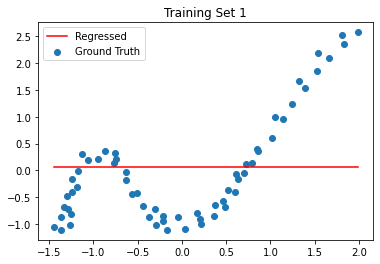

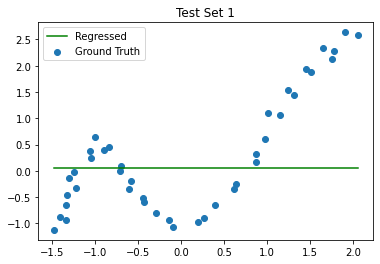

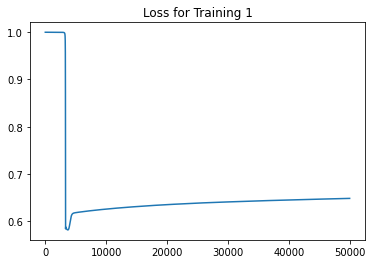

In [69]:
plt.scatter(train1xNor, train1yNor)
result_x_train = np.linspace(np.min(train1xNor), np.max(train1xNor), 100)[:,np.newaxis]
result_y_train = model.forward(result_x_train)
plt.plot(result_x_train, result_y_train, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 1')
plt.show()

#test
plt.scatter(test1xNor, test1yNor)

result_x_test = np.linspace(np.min(test1xNor), np.max(test1xNor), 100)[:,np.newaxis]
result_y_test = model.forward(result_x_test)
plt.plot(result_x_test, result_y_test, color = 'green')
plt.legend(['Regressed','Ground Truth'])
plt.title('Test Set 1')
plt.show()

plt.plot(hist['train_loss'])
plt.title('Loss for Training 1')
plt.show()

In [ ]:
result_y = model.forward(train1xNor)
print('mean', np.mean((result_y - train1yNor)**2))
print('std', np.std((result_y - train1yNor)**2))

result_y = model.forward(test1xNor)
print('mean', np.mean((result_y - test1yNor)**2))
print('std', np.std((result_y - test1yNor)**2))

In [ ]:
hiddenOuts = list()
for sample in train1xNor:
    model.forward(sample[:,np.newaxis])
    hiddenOuts.append(model.layers[0].activation.xCache[0,:])
hiddenOuts = np.asarray(hiddenOuts)
hiddenOuts.shape

In [ ]:
for i in range(hiddenOuts.shape[1]):
    plt.plot(train1xNor, hiddenOuts[:,i])
plt.title('Hidden Unit Values for the Range of Outputs')
plt.show()